# Lesson 3 - Decision Trees & Cross Validation

## Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay
    )


## Import and Visualize the Data

In [2]:
df = pd.read_csv('files/heart.csv')
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [3]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [4]:
fig_1, ax_1 = plt.subplots()
sns.countplot(x=df['HeartDisease'], ax=ax_1, palette='Set1')
ax_1.set_title('Heart Disease Distribution')
ax_1.set_xlabel('Heart Disease')
ax_1.set_ylabel('Count')

C:\Users\adesuyi-m\AppData\Local\Temp\ipykernel_12948\1303388047.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['HeartDisease'], ax=ax_1, palette='Set1')


Text(0, 0.5, 'Count')

Text(0, 0.5, 'Count')

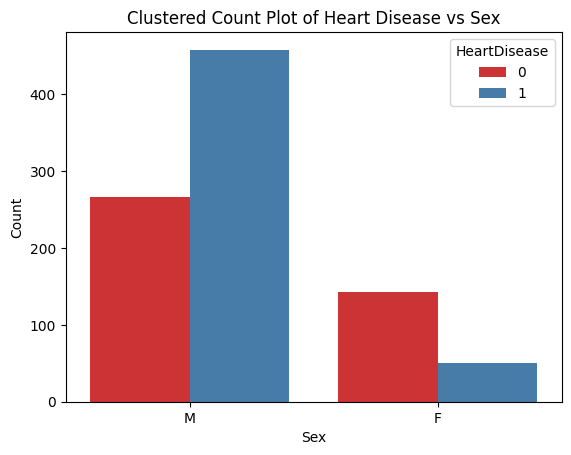

In [5]:
fig_2, ax_2 = plt.subplots()
sns.countplot(data= df, x='Sex', hue='HeartDisease', palette='Set1')
ax_2.set_title('Clustered Count Plot of Heart Disease vs Sex')
ax_2.set_xlabel('Sex')
ax_2.set_ylabel('Count')

C:\Users\adesuyi-m\AppData\Local\Temp\ipykernel_12948\1978882878.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['HeartDisease'], y=df['RestingBP'], palette='Set1')


Text(0, 0.5, 'Resting Blood Pressure')

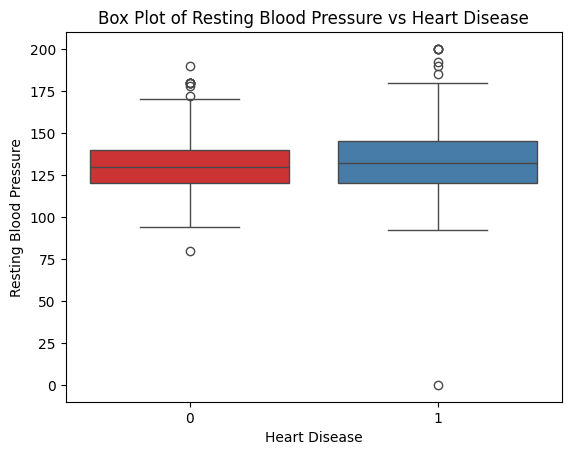

In [6]:
fig_3, ax_3 = plt.subplots()
sns.boxplot(x=df['HeartDisease'], y=df['RestingBP'], palette='Set1')
ax_3.set_title('Box Plot of Resting Blood Pressure vs Heart Disease')
ax_3.set_xlabel('Heart Disease')
ax_3.set_ylabel('Resting Blood Pressure')

C:\Users\adesuyi-m\AppData\Local\Temp\ipykernel_12948\2028292751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['HeartDisease'], y=df['MaxHR'], palette='Set1')


Text(0, 0.5, 'Max Heart Rate')

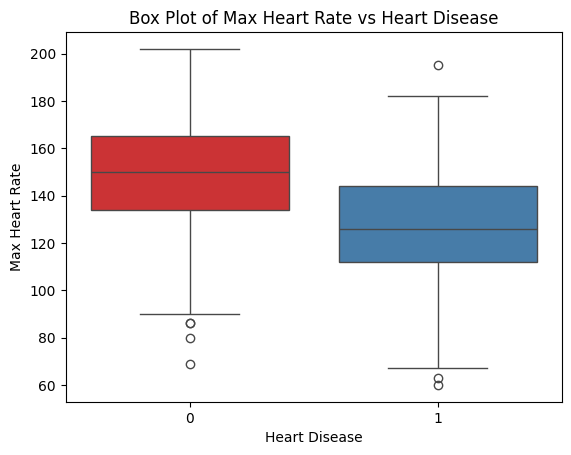

In [7]:
fig_4, ax_4 = plt.subplots()
sns.boxplot(x=df['HeartDisease'], y=df['MaxHR'], palette='Set1')
ax_4.set_title('Box Plot of Max Heart Rate vs Heart Disease')
ax_4.set_xlabel('Heart Disease')
ax_4.set_ylabel('Max Heart Rate')

C:\Users\adesuyi-m\AppData\Local\Temp\ipykernel_12948\1238878255.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['HeartDisease'], y=df['Age'], palette='Set2', ax=ax_5)


Text(0, 0.5, 'Age')

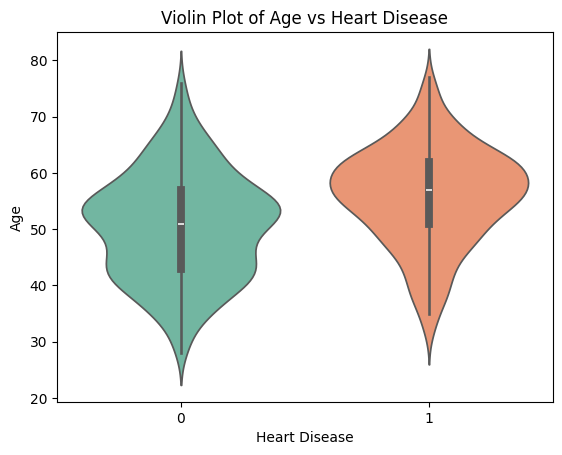

In [8]:
fig_5, ax_5 = plt.subplots()
sns.violinplot(x=df['HeartDisease'], y=df['Age'], palette='Set2', ax=ax_5)
ax_5.set_title('Violin Plot of Age vs Heart Disease')
ax_5.set_xlabel('Heart Disease')
ax_5.set_ylabel('Age')

## Preprocess Data

In [9]:
df_cleaned = pd.get_dummies(data=df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True, dtype=int)
df_cleaned

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0        1                  1                  0                 0   
1        0                  0                  1                 0   
2        1                  1                  0                 0   
3        0                  0                  0                 0   
4        1                  0                  1                 0   
..     ...                ...                ...               ...   
913      1                  0                  0                 1   
914      1                  0                  0                 0   
915      1                  0                  0                 0   
916      0                  1                  0                 0   
917      1                  0                  1                 0   

     RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                    1              0                 0              0   
1                    1              0                 0              1   
2                    0              1                 0              0   
3                    1              0                 1              1   
4                    1              0                 0              0   
..                 ...            ...               ...            ...   
913                  1              0                 0              1   
914                  1              0                 0              1   
915                  1              0                 1              1   
916                  0              0                 0              1   
917                  1              0                 0              0   

     ST_Slope_Up  
0              1  
1              0  
2              1  
3              0  
4              1  
..           ...  
913            0  
914            0  
915            0  
916            0  
917            1  

[918 rows x 16 columns]

In [15]:
X = df_cleaned.drop(columns=['HeartDisease'])
y = df_cleaned['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_M  \
485   63        139          217          1    128      1.2      1   
486   55        110          214          1    180      0.4      1   
117   59        130          338          1    130      1.5      0   
361   47        160            0          0    124      0.0      1   
296   50        145            0          1    139      0.7      1   
..   ...        ...          ...        ...    ...      ...    ...   
276   51        135          160          0    150      2.0      1   
201   46        120          230          0    150      0.0      1   
462   59        122          233          0    117      1.3      1   
252   61        125          292          0    115      0.0      1   
62    45        140          224          0    144      0.0      1   

     ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
485                  1                  0                 0   
486                  1                  0                 0   
117                  0                  0                 0   
361                  0                  0                 0   
296                  0                  0                 0   
..                 ...                ...               ...   
276                  0                  1                 0   
201                  0                  1                 0   
462                  0                  0                 0   
252                  0                  0                 0   
62                   0                  0                 0   

     RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
485                  0              1                 1              1   
486                  0              1                 0              0   
117                  0              1                 1              1   
361                  1              0                 1              1   
296                  1              0                 1              1   
..                 ...            ...               ...            ...   
276                  1              0                 0              1   
201                  1              0                 0              0   
462                  1              0                 1              0   
252                  0              1                 1              0   
62                   1              0                 0              0   

     ST_Slope_Up  
485            0  
486            1  
117            0  
361            0  
296            0  
..           ...  
276            0  
201            1  
462            0  
252            1  
62             1  

[734 rows x 15 columns]

## Fit Decision Tree Model and View Results

Training Accuracy: 0.9250681198910081
Testing Accuracy: 0.8097826086956522
F1 Score: 0.8356807511737089
Precision Score: 0.8018018018018018
Recall Score: 0.8725490196078431


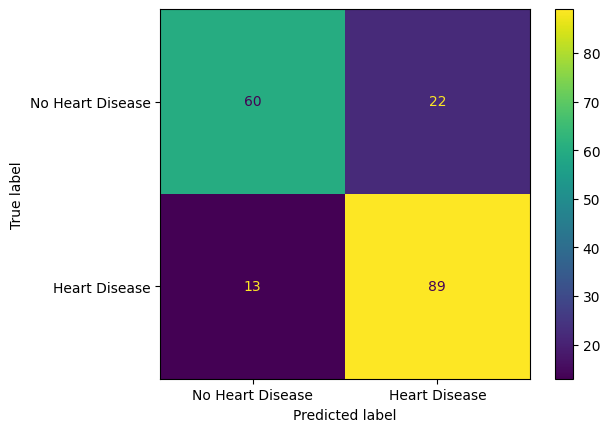

In [18]:
dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=8, max_features='sqrt')
dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("Precision Score:", precision_score(y_test, y_test_pred))
print("Recall Score:", recall_score(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot()

In [ ]:
import dtreeviz

# Visualize the actual decision tree
viz = dtreeviz.model(model=dt,
               X_train=X_train,
               y_train=y_train,
               feature_names=X_train.columns,
               target_name='Heart Disease',
               class_names=['No Heart Disease', 'Heart Disease'])

viz.view()


c:\Users\adesuyi-m\pythonDataScienceLesson-3\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect

## Use Cross Validation to find best parameters for Decision Tree

In [ ]:
# This is a grid of possible parameters that the grid search will go through to find the parameters that give you the best decision tree model
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 8, 9, 11],
    'max_features': ['sqrt', 'log2', None],
    'splitter': ['best', 'random']
}

# Set an empty dicision tree classifier
dt_cv = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=dt_cv, param_grid=param_grid, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best Parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
best_parameters = grid_search.best_params_
best_criterion = best_parameters['criterion']
best_max_depth = best_parameters['max_depth']
best_max_features = best_parameters['max_features']
best_splitter = best_parameters['splitter']

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'splitter': 'random'}
Best Score: 0.8606350014096787


Training Accuracy (Best): 0.8773841961852861
Testing Accuracy (Best): 0.8532608695652174
F1 Score (Best):  0.8787878787878788
Precision Score (Best): 0.8787878787878788
Recall Score (Best): 0.8529411764705882


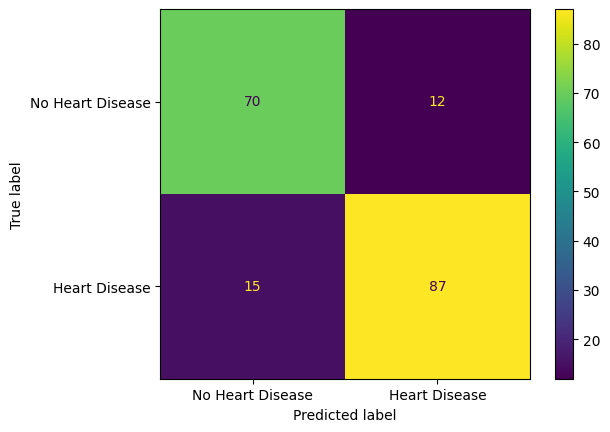

In [ ]:
# Fit a decision tree with the best parameters
dt_best = DecisionTreeClassifier(criterion=best_criterion, max_depth=best_max_depth, max_features=best_max_features, splitter=best_splitter)
dt_best.fit(X_train, y_train)
y_train_pred_best = dt_best.predict(X_train)
y_test_pred_best = dt_best.predict(X_test)
print("Training Accuracy (Best):", accuracy_score(y_train, y_train_pred_best))
print("Testing Accuracy (Best):", accuracy_score(y_test, y_test_pred_best))
print("F1 Score (Best): ", precision_score(y_test, y_test_pred_best))
print("Precision Score (Best):", precision_score(y_test, y_test_pred_best))
print("Recall Score (Best):", recall_score(y_test, y_test_pred_best))

# Display the confusion matrix
cm = confusion_matrix(y_test, y_test_pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
disp_best.plot()

c:\Users\adesuyi-m\pythonDataScienceLesson-3\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect

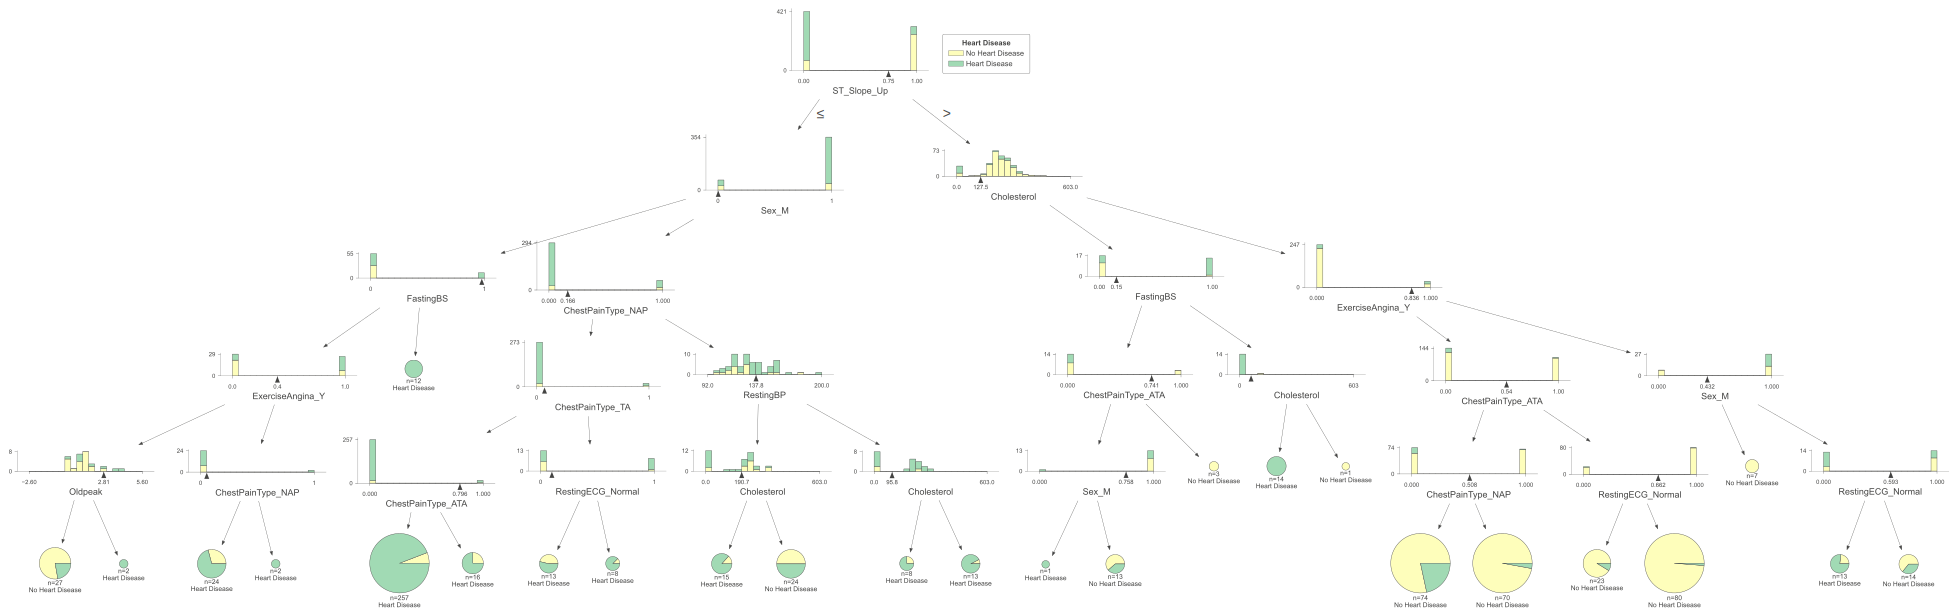

In [ ]:
viz_best = dtreeviz.model(model=dt_best,
               X_train=X_train,
               y_train=y_train,
               feature_names=X_train.columns,
               target_name='Heart Disease',
               class_names=['No Heart Disease', 'Heart Disease'])

viz_best.view()